In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif

In [3]:
iris=load_iris()
X=iris.data
y=iris.target


In [12]:
df=pd.DataFrame(X,columns=iris.feature_names)
df['target']=pd.Categorical.from_codes(y,iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
info_gain=mutual_info_classif(X,y,random_state=42)

In [14]:
info_gain

array([0.5113651 , 0.29942431, 0.99257309, 0.98564251])

In [5]:
for i,feature in enumerate(iris.feature_names):
    print(f"{feature} : {info_gain[i]}")

sepal length (cm) : 0.5113651047986985
sepal width (cm) : 0.2994243107086385
petal length (cm) : 0.9925730881120935
petal width (cm) : 0.9856425060576723


In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)
dtree=DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

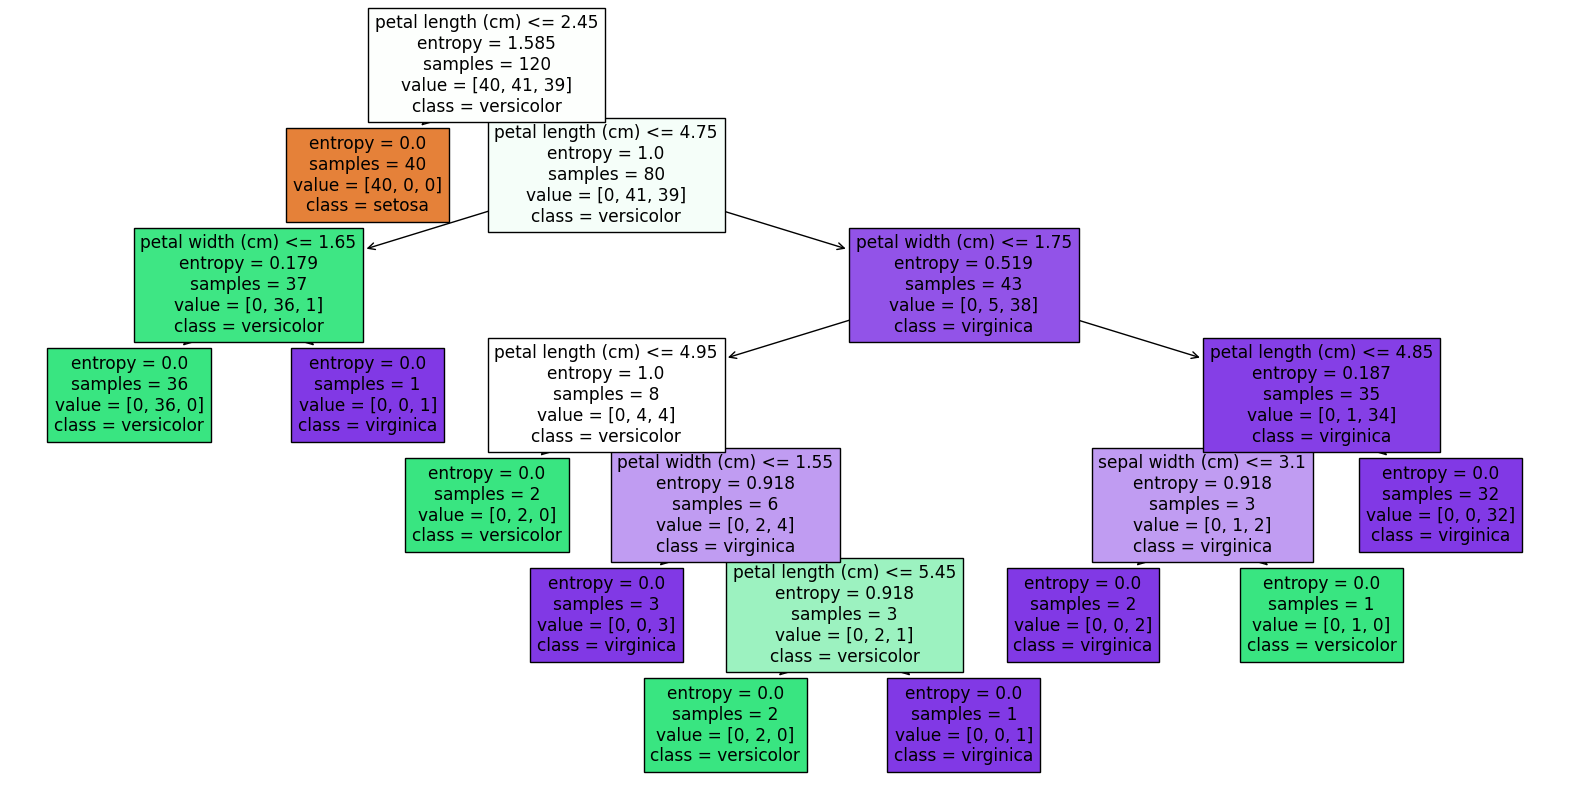

In [7]:
plt.figure(figsize=(20,10))
plot_tree(dtree, filled=True,feature_names=iris.feature_names,class_names=iris.target_names)
plt.show()


In [8]:
clf=DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [9]:
newsamp=[[5.1,3.5,1.4,0.2]]
pred=dtree.predict(newsamp)
print(f'Predicted sample based on vales: {iris.target_names[pred][0]}')

Predicted sample based on vales: setosa
